# MLP com Scikit Learn

Fonte: https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

## Problema a ser analisado

Desenvolver um classificador para analisar dados de pessoas diabéticas e classifica-las.

#### Dataset

Amostras - 768
Features - 9

gravidez - Número de vezes grávidas.

glicose - Concentração de glicose no plasma.

diastólica - pressão arterial diastólica (mm Hg).

SkinThickness - Espessura da dobra cutânea (mm).

insulina - insulina sérica por hora (mu U/ml).

IMC – Taxa metabólica basal (peso em kg/altura em m).

DiabetesPedigreeFunction - Função do pedigree do diabetes.

idade - Idade em anos.

diabetes - “1” representa a presença de diabetes enquanto “0” representa a ausência dela.

### Passo a passo:


 Passo 1 - Carregando as bibliotecas e módulos necessários.

 Passo 2 - Lendo os dados e realizando verificações básicas de dados.

 Etapa 3 - Criando arrays para os recursos e a variável de resposta.

 Etapa 4 - Criando os conjuntos de dados de treinamento e teste.

 Etapa 5 - Construir, prever e avaliar o modelo de rede neural.

In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

!chmod 600 /content/kaggle.json

!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip -d /content/kaggle/

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 8.08MB/s]
Archive:  pima-indians-diabetes-database.zip
  inflating: /content/kaggle/diabetes.csv  


In [ ]:
# Import required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
df = pd.read_csv('/content/kaggle/diabetes.csv') 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
target_column = ['Outcome'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.226180,0.198210,0.000000,0.058824,0.176471,0.352941,1.0
Glucose,768.0,0.607510,0.160666,0.000000,0.497487,0.587940,0.704774,1.0
BloodPressure,768.0,0.566438,0.158654,0.000000,0.508197,0.590164,0.655738,1.0
SkinThickness,768.0,0.207439,0.161134,0.000000,0.000000,0.232323,0.323232,1.0
Insulin,768.0,0.094326,0.136222,0.000000,0.000000,0.036052,0.150414,1.0
BMI,768.0,0.476790,0.117499,0.000000,0.406855,0.476900,0.545455,1.0
DiabetesPedigreeFunction,768.0,0.194990,0.136913,0.032231,0.100723,0.153926,0.258781,1.0
Age,768.0,0.410381,0.145188,0.259259,0.296296,0.358025,0.506173,1.0
Outcome,768.0,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.0


In [ ]:
X = df[predictors].values
y = df[target_column].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape)
print(X_test.shape)

(537, 8)
(231, 8)


In [ ]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


count_classes = y_test.shape[1]
print(count_classes)

2


In [ ]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=8))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

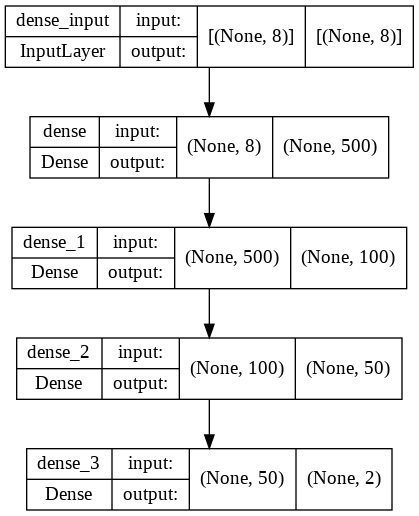

In [ ]:
import tensorflow as tf

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, expand_nested=True)


In [ ]:
# build the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=20)

Epoch 1/20
17/17 [==============================] - 1s 18ms/step - loss: 0.6607 - accuracy: 0.6499 - val_loss: 0.6670 - val_accuracy: 0.6147
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 0.6271 - accuracy: 0.6741 - val_loss: 0.6322 - val_accuracy: 0.6710
Epoch 3/20
17/17 [==============================] - 0s 5ms/step - loss: 0.5977 - accuracy: 0.6965 - val_loss: 0.6005 - val_accuracy: 0.6840
Epoch 4/20
17/17 [==============================] - 0s 5ms/step - loss: 0.5622 - accuracy: 0.7132 - val_loss: 0.5711 - val_accuracy: 0.7316
Epoch 5/20
17/17 [==============================] - 0s 5ms/step - loss: 0.5488 - accuracy: 0.7300 - val_loss: 0.5534 - val_accuracy: 0.7403
Epoch 6/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5157 - accuracy: 0.7523 - val_loss: 0.6165 - val_accuracy: 0.6840
Epoch 7/20
17/17 [==============================] - 0s 5ms/step - loss: 0.5151 - accuracy: 0.7449 - val_loss: 0.5848 - val_accuracy: 0.7143
Epoch 8/20
17/17 [=

In [ ]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)

print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   

 

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.7802606821060181% 
 Error on training data: 0.21973931789398193
Accuracy on test data: 0.7359307408332825% 
 Error on test data: 0.26406925916671753


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


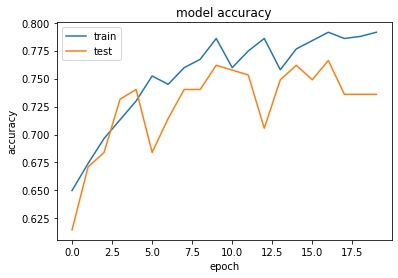

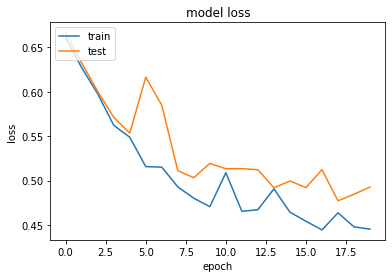

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()